In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split , GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report , confusion_matrix ,accuracy_score
from imblearn.over_sampling import ADASYN
plt.style.use('dark_background')

In [3]:
df = pd.read_csv('Bank Customer Churn.csv', index_col= "customer_id")
df.head(5) 

,credit_score,country,gender,age,tenure,balance,products_number,credit_card,active_member,estimated_salary,churn
customer_id,,,,,,,,,,,
15634602,619,France,Female,42,2,0.00,1,1,1,101348.88,1
15647311,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
15619304,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
15701354,699,France,Female,39,1,0.00,2,0,0,93826.63,0
15737888,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 10000 entries, 15634602 to 15628319
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   credit_score      10000 non-null  int64  
 1   country           10000 non-null  object 
 2   gender            10000 non-null  object 
 3   age               10000 non-null  int64  
 4   tenure            10000 non-null  int64  
 5   balance           10000 non-null  float64
 6   products_number   10000 non-null  int64  
 7   credit_card       10000 non-null  int64  
 8   active_member     10000 non-null  int64  
 9   estimated_salary  10000 non-null  float64
 10  churn             10000 non-null  int64  
dtypes: float64(2), int64(7), object(2)
memory usage: 937.5+ KB


In [5]:
df.describe()

,credit_score,age,tenure,balance,products_number,credit_card,active_member,estimated_salary,churn
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,650.528800,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,96.653299,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,584.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000
max,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000


In [6]:
df.describe(include='object')

,country,gender
count,10000,10000
unique,3,2
top,France,Male
freq,5014,5457


In [7]:
df.isnull().sum()

credit_score        0
country             0
gender              0
age                 0
tenure              0
balance             0
products_number     0
credit_card         0
active_member       0
estimated_salary    0
churn               0
dtype: int64

In [8]:
print(df.duplicated().sum())

0


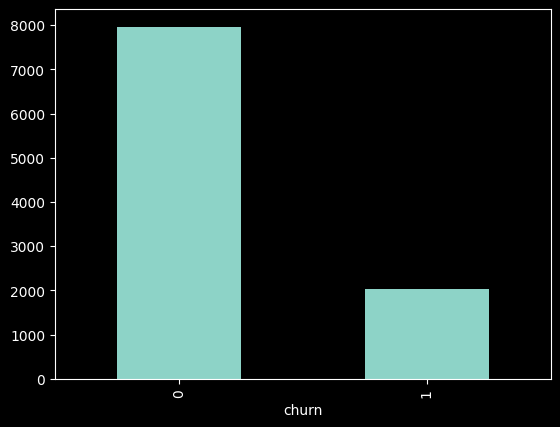

In [9]:
nb_class = df['churn'].value_counts()
nb_class.plot(kind = 'bar')
plt.show()

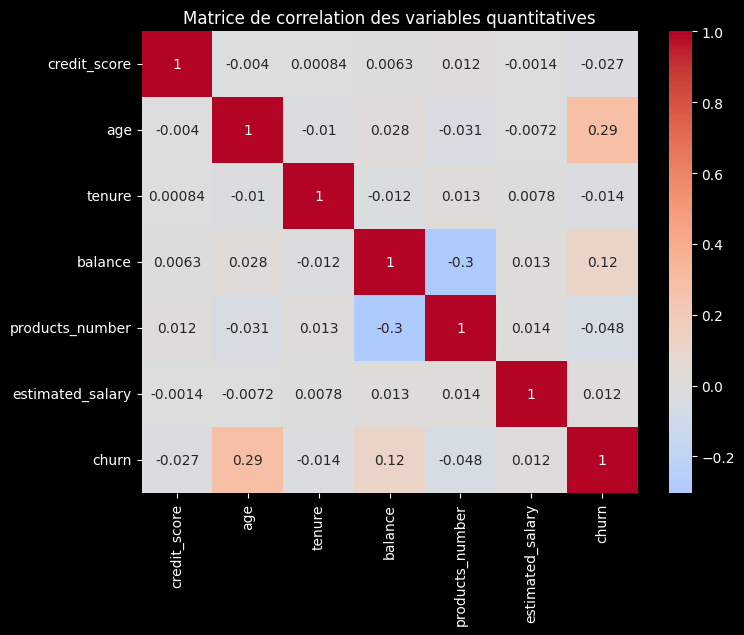

In [10]:
corr_mat = df[['credit_score', 'age', 'tenure', 'balance', 'products_number', 'estimated_salary', 'churn']].corr()
plt.figure(figsize=(8,6))
sns.heatmap(corr_mat , annot=True, cmap='coolwarm' , center=0)
plt.title('Matrice de correlation des variables quantitatives')
plt.show()

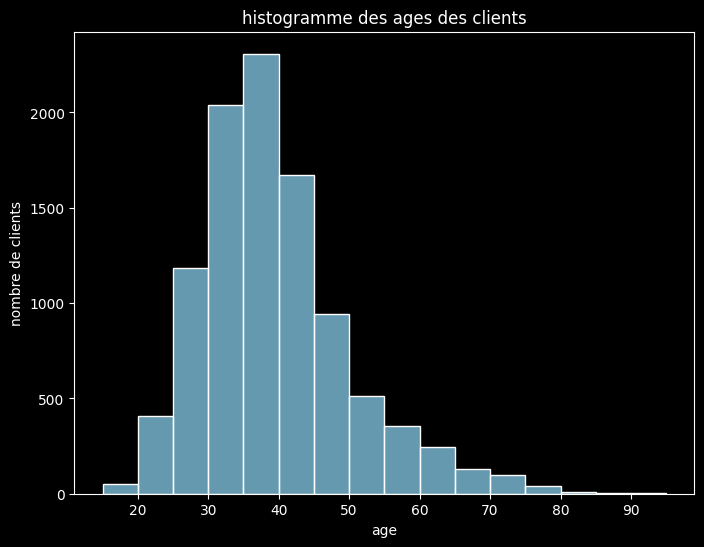

In [11]:
bins = np.arange(15,100,5)
plt.figure(figsize=(8,6))
sns.histplot(df['age'], bins=bins, color='skyblue')
plt.title('histogramme des ages des clients')
plt.xlabel('age')
plt.ylabel('nombre de clients')
plt.show()

In [12]:
X = df.drop(columns=["churn"])
y = df["churn"]

In [13]:
X["gender"] = X["gender"].map({'Male' : 0 , 'Female':1})
X = pd.get_dummies(X, columns=["country"], drop_first=True)

In [14]:
# X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=42, stratify=y)

In [15]:
# adasyn = ADASYN(random_state=42)
# X_train_res, y_train_rest = adasyn.fit_resample(X_train, y_train)

In [16]:
# scaler = StandardScaler()
# X_train_scaled = scaler.fit_transform(X_train_res)
# X_test_scaled = scaler.transform(X_test)

In [17]:
# knn = KNeighborsClassifier(n_neighbors=50)
# knn.fit(X_train_scaled, y_train_rest)

In [18]:
# y_train_pred = knn.predict(X_train_scaled)
# y_test_pred = knn.predict(X_test_scaled)

In [19]:
# print("Accuracy sur les données d'entraînement :", accuracy_score(y_train_rest, y_train_pred))
# print("Accuracy sur les données de test :", accuracy_score(y_test, y_test_pred))


In [20]:
# print("rapport de classification (test) : \n", classification_report(y_test, y_test_pred))


In [21]:
# cm = confusion_matrix(y_test, y_test_pred)
# plt.figure(figsize=(8,6))
# sns.heatmap(cm , annot=True, cmap="Blues" , fmt="d", xticklabels=[0,1], yticklabels=[0,1])
# plt.xlabel("predit")
# plt.ylabel("reel")
# plt.title("Matrice de confusion")
# plt.show()

In [23]:
# from collections import Counter
# print("Distribution des classes après ADASYN :", Counter(y_train_rest))

In [24]:
adasyn = ADASYN(random_state=42)
X_resampled , y_resampled = adasyn.fit_resample(X,y)

In [25]:
X_train , X_test, y_train , y_test = train_test_split(X_resampled, y_resampled, test_size=0.2, stratify=y_resampled)

In [26]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [41]:
knn = KNeighborsClassifier(n_neighbors=7)
knn.fit(X_train_scaled, y_train)

,n_neighbors,7
,weights,'uniform'
,algorithm,'auto'
,leaf_size,30
,p,2
,metric,'minkowski'
,metric_params,None
,n_jobs,None


In [42]:
y_train_pred = knn.predict(X_train_scaled)
y_test_pred = knn.predict(X_test_scaled)

In [43]:
print("accuracy sur les donnees d'entrainement :", accuracy_score(y_train, y_train_pred))
print("accuracy sur les donnees de test : ",accuracy_score(y_test,y_test_pred))

accuracy sur les donnees d'entrainement : 0.8624529485570891
accuracy sur les donnees de test :  0.8246549560853199


In [44]:
print("rapport de classification (test) : \n" , classification_report(y_test,y_test_pred))

rapport de classification (test) : 
               precision    recall  f1-score   support

           0       0.83      0.82      0.82      1593
           1       0.82      0.83      0.83      1595

    accuracy                           0.82      3188
   macro avg       0.82      0.82      0.82      3188
weighted avg       0.82      0.82      0.82      3188



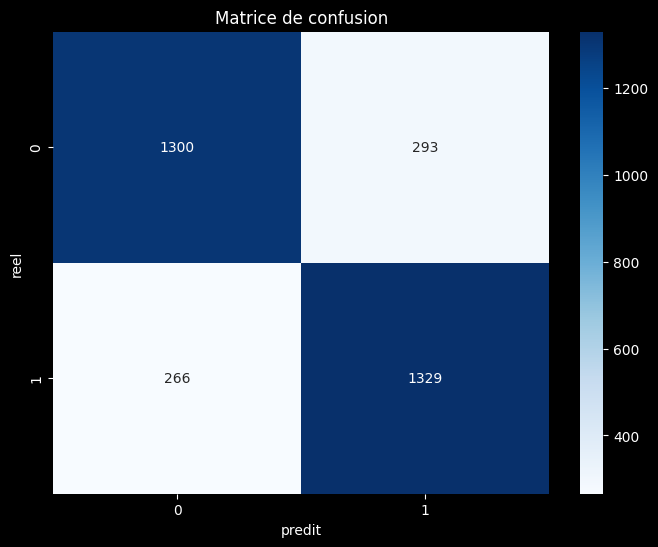

In [45]:
cm = confusion_matrix(y_test, y_test_pred)
plt.figure(figsize=(8,6))
sns.heatmap(cm , annot=True, cmap="Blues" , fmt="d", xticklabels=[0,1], yticklabels=[0,1])
plt.xlabel("predit")
plt.ylabel("reel")
plt.title("Matrice de confusion")
plt.show()

In [46]:
import joblib
joblib.dump(knn , "model.pkl")

['model.pkl']